<a href="https://colab.research.google.com/github/SDS-AAU/M3-2018/blob/master/notebooks/Neural_City_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Let's (neural) predict the continent given the Nomadlist Citydata from M1

![nomad](https://cdn-images-1.medium.com/max/2000/1*CDiNeEaefU0BU6-R8ZY3hg.jpeg)

In [0]:
# Let's import data minging standard-libraries

import pandas as pd
import numpy as np

# classification report
from sklearn.metrics import classification_report

In [0]:
# We can load the data directly out of the M1 repo

data = pd.read_csv('https://github.com/SDS-AAU/M1-2018/raw/master/assignments/assignment_2/cities_predict.csv')

In [3]:
# A first look: Just to recap what was in the data:

data.head()

,1br_studio_rent_in_center,adult_nightlife,air_quality_(year-round),airbnb_(monthly),cashless_society,coca-cola,coffee,cost_of_living,cost_of_living_for_expat,cost_of_living_for_local,...,religious_government,safe_tap_water,safety,startup_score,traffic_safety,walkability,nomad_score,region,country,place_slug
0,492.0,4.0,42.0,946.0,1.00000,0.70,1.40,3.0,961.0,626.0,...,0.0,0.0,1.0,3.0,4.0,4.0,4.03,Latin America,Mexico,mexico-city-mexico
1,223.0,3.0,19.0,976.0,1.00000,0.63,1.11,3.0,697.0,349.0,...,0.0,0.0,2.0,3.0,4.0,4.0,4.51,Latin America,Mexico,cancun-mexico
2,503.0,2.0,68.0,1312.0,1.06622,0.54,0.70,3.0,1064.0,631.0,...,1.0,0.0,3.0,2.0,1.0,1.0,4.45,Middle East,Jordan,amman-jordan
3,426.0,2.0,23.0,885.0,2.00000,0.44,1.41,3.0,789.0,522.0,...,0.0,0.0,3.0,3.0,3.0,4.0,4.83,Asia,Vietnam,ho-chi-minh-city-vietnam
4,2740.0,2.0,49.0,2135.0,3.00000,1.06,3.40,1.0,2801.0,2347.0,...,0.0,0.0,3.0,4.0,3.0,4.0,4.11,Asia,China,hong-kong-china


## Preprocessing for classification

"traditional" classification algos. from Sklearn will behappy with a int-encoded variable as ```y``` but remember: **neural nets need a dummy matrix**

In [0]:
# Let's encode our target variable "Region" into a number for the traditional classification (sklearn algo)

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

y = encoder.fit_transform(data['region'])

In [0]:
# Cut out the input-data X and transform it into an array using .values

X = data.loc[:,:'nomad_score'].values

In [6]:
# A quick check if we need to scale the data:

data.loc[:,:'nomad_score'].describe()

# Obviousely we need to do that.

,1br_studio_rent_in_center,adult_nightlife,air_quality_(year-round),airbnb_(monthly),cashless_society,coca-cola,coffee,cost_of_living,cost_of_living_for_expat,cost_of_living_for_local,...,peace,quality_of_life,racial_tolerance,religious_government,safe_tap_water,safety,startup_score,traffic_safety,walkability,nomad_score
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,656.096715,2.106849,40.608915,1711.775567,1.914128,1.338260,2.481932,2.187671,1444.247266,888.146074,...,2.489041,2.887671,2.138097,0.210959,0.475342,2.760274,2.927397,3.473973,3.272603,3.906561
std,465.218067,0.358448,44.044073,941.886884,0.735266,0.869454,1.271214,0.868034,742.139699,506.694402,...,1.011872,0.360591,0.888359,0.408269,0.499734,0.904984,0.678043,0.948615,1.210806,0.432857
min,62.510904,2.000000,1.000000,275.000000,1.000000,0.000000,0.000000,1.000000,374.000000,177.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.260000
25%,314.250000,2.000000,16.000000,1098.000000,1.000000,0.580000,1.442500,1.000000,792.000000,477.250000,...,2.000000,3.000000,1.371214,0.000000,0.000000,2.000000,3.000000,3.000000,2.000000,3.630000
50%,554.000000,2.000000,24.000000,1495.000000,2.000000,1.185000,2.405000,2.000000,1302.000000,803.500000,...,3.000000,3.000000,2.000000,0.000000,0.000000,3.000000,3.000000,4.000000,4.000000,3.970000
75%,870.750000,2.000000,50.000000,2098.192785,2.244617,1.940000,3.467500,3.000000,1962.250000,1199.750000,...,3.000000,3.000000,3.000000,0.000000,1.000000,3.000000,3.000000,4.000000,4.000000,4.250000
max,2783.000000,4.000000,368.000000,7839.000000,3.000000,5.000000,8.610000,4.000000,4147.000000,2980.000000,...,4.000000,4.000000,4.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.970000


In [0]:
# Scaling the inputs using the sklearn standard scaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [0]:
# Split the data into train-test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

## Let's run some baseline models

 - Logistic regression
 - XGboost

### Logistic regression

In [0]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [10]:
# Fit the model
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
# Evaluate the results

print('score:' + str(classifier.score(X_test, y_test)))
print() #empty line


y_pred = classifier.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

score:0.8287671232876712

             precision    recall  f1-score   support

          0       0.57      0.57      0.57         7
          1       0.88      0.88      0.88        41
          2       0.83      0.90      0.86        49
          3       0.89      0.85      0.87        20
          4       0.67      0.33      0.44         6
          5       0.81      1.00      0.89        17
          6       0.50      0.17      0.25         6

avg / total       0.82      0.83      0.82       146



### XGBoost - eXtreme Gradient Boosting

![alt text](https://raw.githubusercontent.com/dmlc/dmlc.github.io/master/img/logo-m/xgboost.png)

XGBoost is a super efficient and popular algo (not from sklearn)
read more  [here:](https://xgboost.readthedocs.io/en/latest/tutorials/model.html)

It will be hard to beat the result of that model (even using it "out of the box")

In [0]:
# import xgb
from xgboost import XGBClassifier

classifier = XGBClassifier()

In [13]:
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [14]:
print('score:' + str(classifier.score(X_test, y_test)))
print() #empty line


y_pred = classifier.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

score:0.9041095890410958

             precision    recall  f1-score   support

          0       0.75      0.86      0.80         7
          1       0.93      0.95      0.94        41
          2       0.89      0.98      0.93        49
          3       0.89      0.85      0.87        20
          4       1.00      0.33      0.50         6
          5       0.94      1.00      0.97        17
          6       1.00      0.50      0.67         6

avg / total       0.91      0.90      0.90       146



/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## Let's prepare our output variable for the neural net model

![alt text](https://www.machinelearningplus.com/wp-content/uploads/2018/03/one-hot-encoding.png)


We need to create a dummy-matrix for our output-layer. In ML this is often called One Hot Encoding.

Reverse transformation is easy (yet not too obvious) using: ```np.argmax(encoded_dummy_matrix, axis=1)```

Given possible values 0, 1 and 2, the encoder transforms

0: to 1, 0, 0
1: to 0, 1, 0
2: to 0, 0, 1

np argmax will do the reverse. However, we have to remember that the neural net will not spit out 0/1 values but something like:

```0.2, 0.6, 0.2```

in that case we can say that the predicted class is 1. Why? Because the value at index 1 is highest.

In [0]:
# Import and instantiate the one hot encoder

from sklearn.preprocessing import OneHotEncoder
one_hot_enc = OneHotEncoder()

Remember that our initial y has to be reshaped from being a long vector with *n* elements to a 2D matrix of shape (n, 1)

In [0]:
# Create the dummy-matrix and reshaping (actually the other way around)

y_matrix = one_hot_enc.fit_transform(y.reshape(-1,1))

In [0]:
# Create new train and test-splits

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_matrix, test_size = 0.2, random_state = 42)

In [18]:
# Quick check of the created sets

print(X_train.shape)
print(y_train.shape)

(584, 29)
(584, 7)


## Let's build a neural net

![alt text](https://www.neuraldesigner.com/images/deep_neural_network.png)

You can think about neural net architecture with Keras as of some sort of Lego.
We will be building different layers with different bricks

In [19]:
# Importing the keras library for deep learning

# Essential elements of Keras
import keras
from keras.models import Sequential
from keras.layers import Dense

# Dropout layer
from keras.layers import Dropout

# Additional stuff: bells and whistles
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

Using TensorFlow backend.


In [0]:
# As in Sklearn and other models we instatiate the classifier first (nothing new here)
classifier = Sequential() 

**A bit on the below architecture**

We start with an input layer, where we have to specify the input dimension: Here it is 29 because we have 29 variables for each observation (but actually you can pick what you feel like.)

We add one hidden layer with 32 neurons. Just because (experiment with other numbers)!
We also add 2 dropout layers. Here it will randomly freeze 30% of the hidden layer neurons each epoch. That step introduces random noise and prevents (to some extent) overfitting. Dropout is one very easy type of regularization.

[More on Dropout](https://medium.com/@amarbudhiraja/https-medium-com-amarbudhiraja-learning-less-to-learn-better-dropout-in-deep-machine-learning-74334da4bfc5)

We use relu as activation function

Finally, we add our output layer with 7 units and use the softmax activation. More on activation functions below.

In [0]:
# From here we build up the network one layer at a time using the "add" method

#### Input Layer ####
classifier.add(Dense(units = 29, activation='relu', input_dim = 29))
classifier.add(Dropout(rate = 0.3))

#### Hidden ####
classifier.add(Dense(units = 32, activation='relu'))
classifier.add(Dropout(rate = 0.3))

#### Output ####
classifier.add(Dense(units = 7, activation='softmax'))

**On ReLU and Softmax**

ReLU stands for rectified linear unit and is defined as: y = max(0, x)
It is the most used activation function for neural nets (today). A few years back the Hyperbolic tangent or Sigmoid funcitons have been very common but it turns out that ReLU performs better.

You can read more on ReLU [here.](https://medium.com/tinymind/a-practical-guide-to-relu-b83ca804f1f7)


In our output layer we use the Softmax function that outputs probabilities that sum up to 1. A great post on softmax and more material [here](https://medium.com/data-science-bootcamp/understand-the-softmax-function-in-minutes-f3a59641e86d) 



![alt text](https://cdn-images-1.medium.com/max/1600/1*DfMRHwxY1gyyDmrIAd-gjQ.png)


Now are done building the network but we are not finished. For it to run, we need to compile it.

Here we need to specify the optimizer that we want to use. Here, we use the efficient "Adam" optimizer. The Adam optimization algorithm is an extension to stochastic gradient descen.t Read more on that [here](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/)

We also need to specify a loss function. Given that we are dealing with a multi-class classification problem, we pick categorical_crossentropy. Please check out the [Keras documentation](https://keras.io/losses/) for more info on loss functions.

We evaluate accuracy during training

In [0]:
#### COMPILE ####
classifier.compile(optimizer="adam", loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [23]:
# Let's check out how our network looks like

classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 29)                870       
_________________________________________________________________
dropout_1 (Dropout)          (None, 29)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                960       
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 231       
Total params: 2,061
Trainable params: 2,061
Non-trainable params: 0
_________________________________________________________________


Now how do we get to the number of 2061 trainable parameters???

Easy:

in the first layer we have 29 neurons, looking at 29 inputs, that means 29 * 29 weights + 29 neurons that will assume some values.

```29*29+29 = 870```

```29*32+32 = 960```

```32*7+7 = 231```

In [0]:
# The checkpointer is not necessary but useful, as it will save the best performing model for later use
checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=0,
                               save_best_only=True)

In [25]:
# We train the model with the fit method (surprise). We specify some parameters: how many observations per batch, how many epochs to train
# the rest is optional but nice (calculate a test-set-performance score at each epoch, shuffle the observations in each batch as well as)
# use the callback which saves the best model.
history = classifier.fit(X_train, y_train, batch_size= 32, epochs= 250, validation_data=(X_test, y_test), shuffle=True,
                        callbacks=[checkpointer])

Train on 584 samples, validate on 146 samples
Epoch 1/250
584/584 [==============================] - 1s 2ms/step - loss: 2.1895 - acc: 0.1558 - val_loss: 1.9569 - val_acc: 0.1918
Epoch 2/250
584/584 [==============================] - 0s 268us/step - loss: 1.8881 - acc: 0.2363 - val_loss: 1.7478 - val_acc: 0.3082
Epoch 3/250
584/584 [==============================] - 0s 256us/step - loss: 1.6994 - acc: 0.3459 - val_loss: 1.5733 - val_acc: 0.4178
Epoch 4/250
584/584 [==============================] - 0s 276us/step - loss: 1.5428 - acc: 0.4127 - val_loss: 1.4316 - val_acc: 0.4795
Epoch 5/250
584/584 [==============================] - 0s 257us/step - loss: 1.4731 - acc: 0.4281 - val_loss: 1.3273 - val_acc: 0.5274
Epoch 6/250
584/584 [==============================] - 0s 262us/step - loss: 1.4021 - acc: 0.4384 - val_loss: 1.2657 - val_acc: 0.5753
Epoch 7/250
584/584 [==============================] - 0s 260us/step - loss: 1.3175 - acc: 0.5103 - val_loss: 1.2079 - val_acc: 0.6096
Epoch 8/250

In [0]:
# Let's plot our trainin process (we actually can look what happened as we were training)
import matplotlib.pyplot as plt

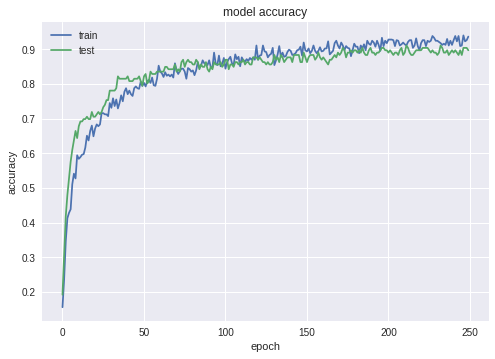

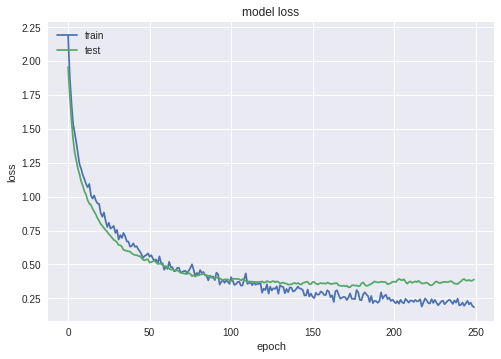

In [27]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
# Load the best model (lowest loss)

model = load_model('model.h5')

In [29]:
# How does it perform?

model.evaluate(X_test,y_test)

146/146 [==============================] - 0s 534us/step


[0.3316655685640361, 0.9041095865915899]

In [30]:
y_pred = model.predict(X_test)



y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

report = classification_report(y_test, y_pred)
print(report)

             precision    recall  f1-score   support

          0       0.71      0.71      0.71         7
          1       0.93      0.93      0.93        41
          2       0.94      0.96      0.95        49
          3       0.82      0.90      0.86        20
          4       1.00      0.67      0.80         6
          5       0.89      1.00      0.94        17
          6       1.00      0.50      0.67         6

avg / total       0.91      0.90      0.90       146



In [31]:
# columns = predicted, rows = real

# y_test.A.ravel() is weird: we need to transform it from a matrix to an array and then flatten it back to a 1D vector.
pd.crosstab(encoder.inverse_transform(y_test.A.ravel()),encoder.inverse_transform(y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


col_0,Africa,Asia,Europe,Latin America,Middle East,North America,Oceania
row_0,,,,,,,
Africa,5,2,0,0,0,0,0
Asia,0,38,1,2,0,0,0
Europe,0,0,47,1,0,1,0
Latin America,1,1,0,18,0,0,0
Middle East,1,0,0,1,4,0,0
North America,0,0,0,0,0,17,0
Oceania,0,0,2,0,0,1,3


We clearly outperform the Logistic Regression and could probably get even better results with more optimization...at the same time we cannot beat XGBoost. But hey.

* Actually in my final run it's: 0.9041095890410958 for XGBoost vs 0.9041095865915899 for the neural net :-O

![alt text](https://media.giphy.com/media/SfYTJuxdAbsVW/giphy.gif)